In [1]:
from labdata.schema import * 
import matplotlib.pyplot as plt

plt.matplotlib.rcParams['pdf.fonttype'] = 42
plt.matplotlib.rcParams['ps.fonttype'] = 42

KILOSORT_PARAM_SET_NUM = 5

PARAMS_TO_PLOT = ['num_spikes','depth','firing_rate',
 'isi_contamination','isi_contamination_hill','amplitude_cutoff','presence_ratio',
 'depth_drift_range','depth_drift_fluctuation','spike_amplitude','spike_duration',
 'trough_time','trough_amplitude','fw3m', 'trough_gradient', 'peak_gradient',
 'peak_time', 'peak_amplitude', 'polarity'] # 'position

PARAMS_TO_PLOT = ['num_spikes',
 'isi_contamination','isi_contamination_hill','amplitude_cutoff','presence_ratio',
 'depth_drift_range','depth_drift_fluctuation','spike_amplitude','spike_duration',
 'trough_time','trough_amplitude','fw3m', 'trough_gradient', 'peak_gradient',
 'peak_time', 'peak_amplitude', 'polarity'] # 'position

[2024-06-04 14:47:11,507][INFO]: Connecting mmelin@churchland-data.cmojfwfr0b9t.us-west-2.rds.amazonaws.com:3306
[2024-06-04 14:47:11,856][INFO]: Connected mmelin@churchland-data.cmojfwfr0b9t.us-west-2.rds.amazonaws.com:3306


In [8]:
subjects = set(SpikeSorting().fetch('subject_name'))

all_unit_metrics = []
for s in subjects:
    all_metrics_query = UnitMetrics() & dict(subject_name=s,)# parameter_set_num=KILOSORT_PARAM_SET_NUM)
    first_session_name = all_metrics_query.fetch('session_name', limit=1)
    if len(first_session_name) == 0:
        continue
    else:
        first_session_name = first_session_name[0]
    print(f'Getting metrics for {s} from {first_session_name}')
    one_session_metrics = all_metrics_query & dict(session_name=first_session_name)
    #one_session_metrics = all_metrics_query

    metrics = one_session_metrics.fetch(as_dict=False)
    all_unit_metrics.extend(metrics)

print(f'\nThere are {len(all_unit_metrics)} neurons to plot.')

Getting metrics for JC164 from 20240427_212600
Getting metrics for _CSH_ZAD_026 from 2020-08-15/001
Getting metrics for MM013 from 2023-08-16/001
Getting metrics for _AL036 from 2020-02-14
Getting metrics for MM018 from 2024-02-22/001
Getting metrics for JC142 from 20240119_200700
Getting metrics for JC162 from 20240406_183000
Getting metrics for _AL031 from 2019-12-02
Getting metrics for JC119 from 20230808_161126
Getting metrics for MM012 from 2023-08-08/001
Getting metrics for MM010 from 2023-10-23/002
Getting metrics for JC141 from 20231105_192202
Getting metrics for MM008 from 2023-03-18/001
Getting metrics for JC131 from 20230720_180000
Getting metrics for JC123 from 20230320_170817
Getting metrics for JC118 from 20230912_150110
Getting metrics for MM009 from 2023-10-16/001
Getting metrics for MM015 from 2023-10-04/001
Getting metrics for _AL032 from 2019-11-22
Getting metrics for JC140 from 20231205_231400
Getting metrics for MM011 from 2023-11-06/001

There are 42524 neurons to

In [3]:
# combine sessions into one dict
metrics_dict = dict()
for key in PARAMS_TO_PLOT:
    ind = one_session_metrics.heading.names.index(key)
    metrics_dict[key] = [m[ind] for m in all_unit_metrics]
ind = one_session_metrics.heading.names.index('parameter_set_num')
ks_param = [m[ind] for m in all_unit_metrics]

In [4]:
cutoff_params = dict(isi_contamination=0.1,
                     amplitude_cutoff= 0.1,
                     spike_duration=0.1,
                     spike_amplitude=25,
                     presence_ratio=0.6)

cutoff_direction = dict(isi_contamination='less',
                        amplitude_cutoff='less',
                        spike_duration='greater',
                        spike_amplitude='greater',
                        presence_ratio='greater')

isi_contamination:  53.8924% units pass the cutoff: less than 0.1
amplitude_cutoff:  38.6593% units pass the cutoff: less than 0.1
presence_ratio:  71.0234% units pass the cutoff: greater than 0.6
spike_amplitude:  79.0661% units pass the cutoff: greater than 25
spike_duration:  79.3311% units pass the cutoff: greater than 0.1
isi_contamination:  41.3786% units pass the cutoff: less than 0.1
amplitude_cutoff:  96.1688% units pass the cutoff: less than 0.1
presence_ratio:  89.5173% units pass the cutoff: greater than 0.6
spike_amplitude:  74.4243% units pass the cutoff: greater than 25
spike_duration:  74.8582% units pass the cutoff: greater than 0.1


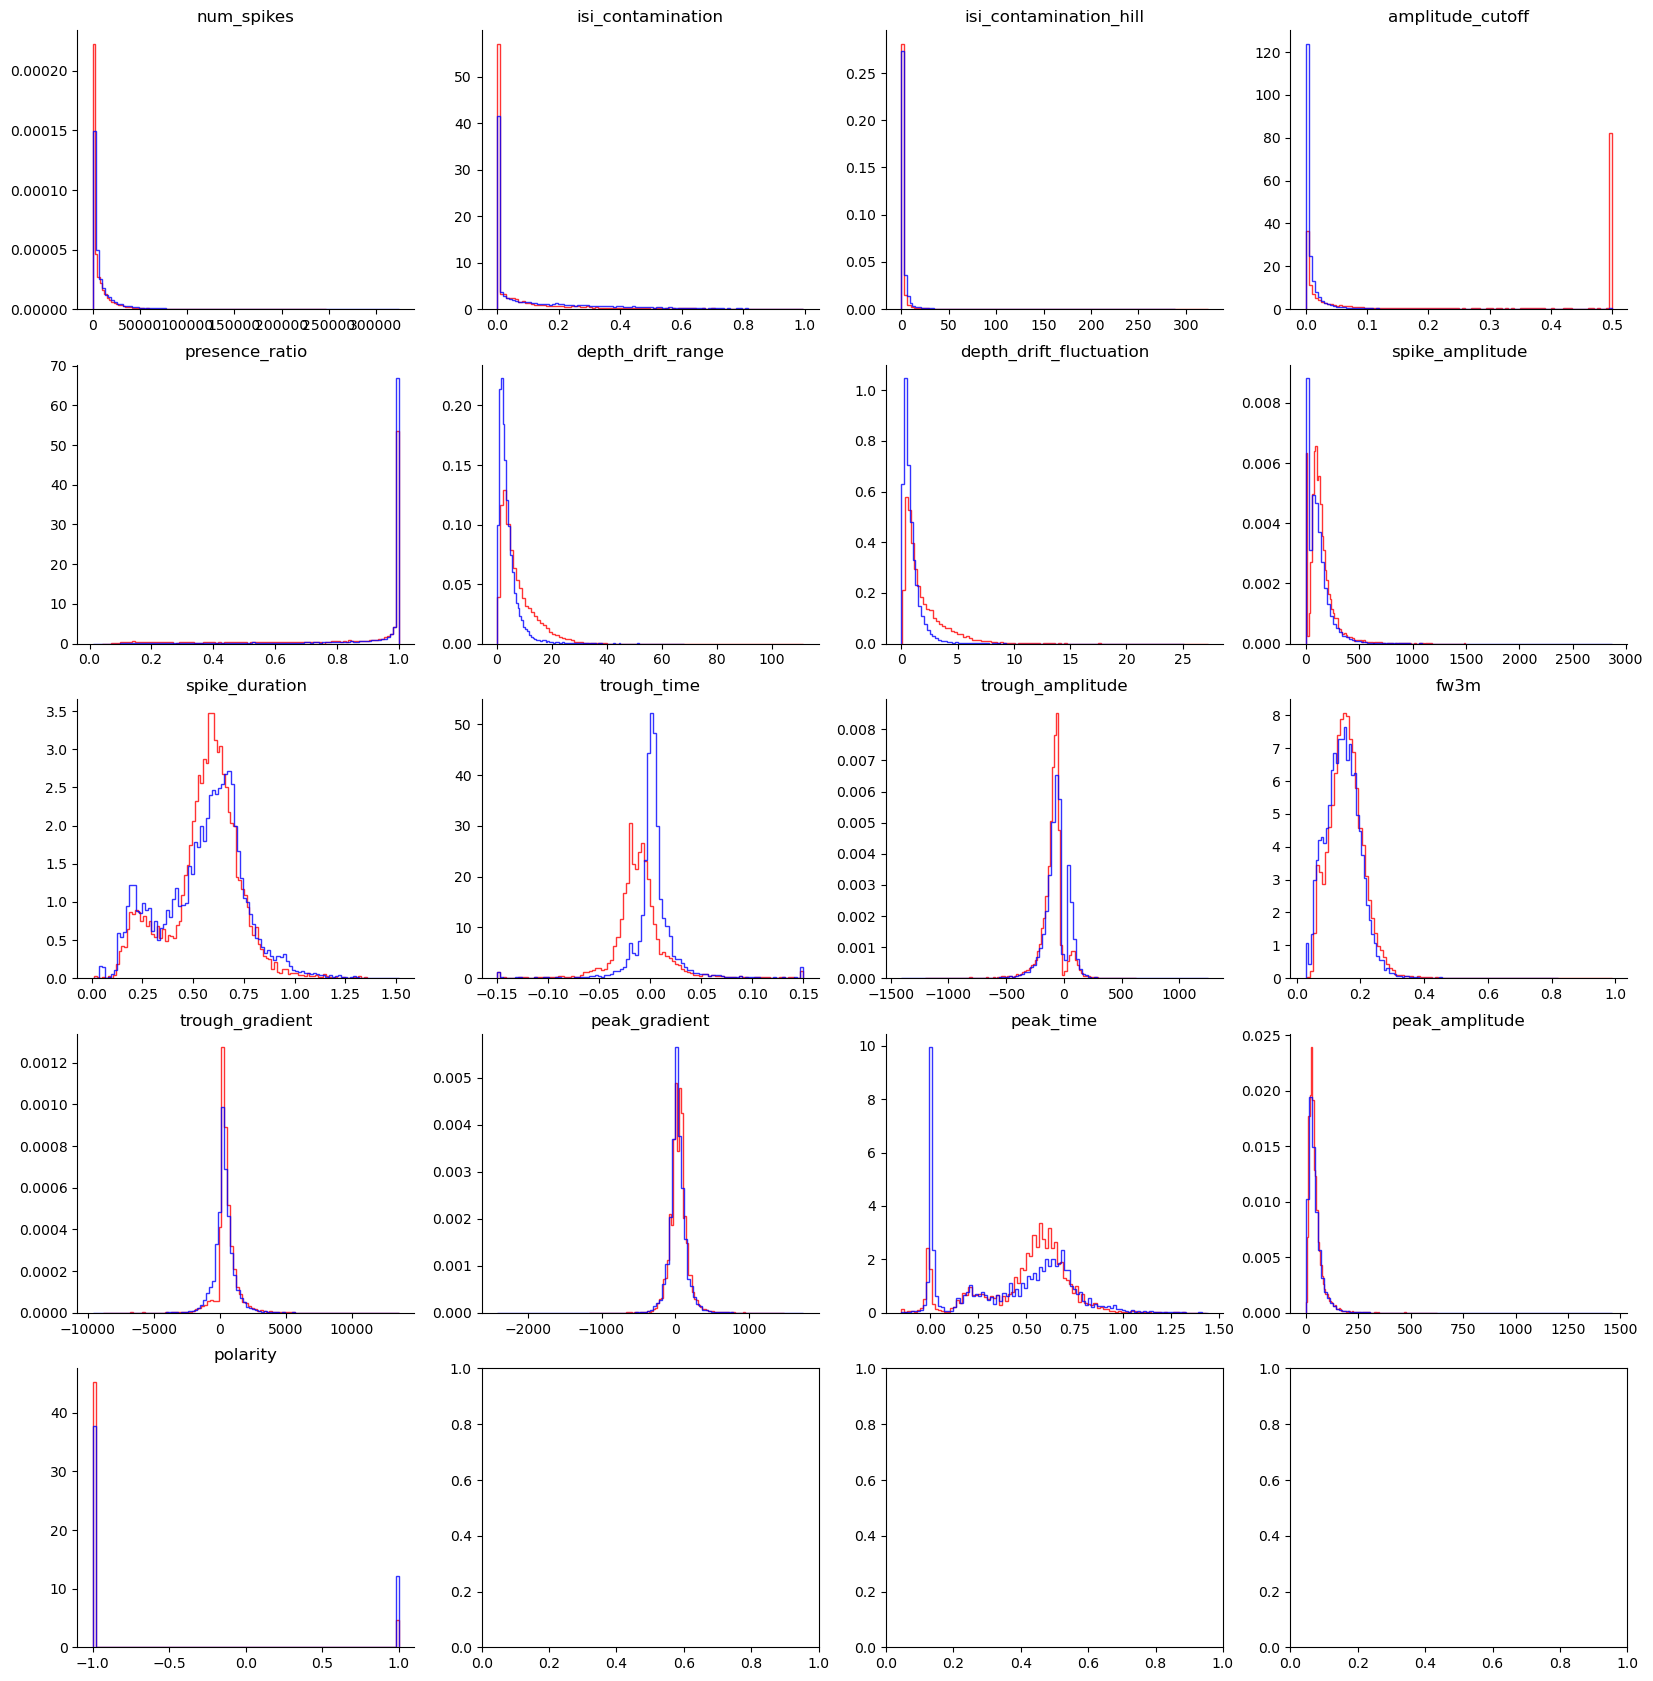

In [10]:
import matplotlib.pyplot as plt
import numpy as np

num_plots = len(metrics_dict)
ncol = 4
fig, axs = plt.subplots(num_plots//ncol+1, ncol, figsize=(20, 5*num_plots//ncol))
cols=['red','blue']
ks_pars_to_plot = [4,5]

for col,ks_param_num_to_plot in zip(cols,ks_pars_to_plot):
    for ax,(key,vals) in zip(np.ravel(axs),metrics_dict.items()):
        vals = np.array(vals).astype(float)
        vals = vals[np.array(ks_param) == ks_param_num_to_plot]
        #print(len(vals))
        numnan = np.isnan(vals).sum()
        #print(f'{key}: {numnan} nans')
    
        #ax.hist(vals, bins=500, histtype='step',color=col)
        ax.hist(vals, bins=100, histtype='step',color=col, density=True, alpha=.8)
        #ax.vlines(np.nanmax(vals)+1e-9, 0, numnan, color='black',alpha=.2,label='NaN\'s')
        #ax.vlines(*ax.get_xlim(), numnan, color='black',alpha=.2,label='NaN\'s')
    
        if key in cutoff_params:
            #ax.axvline(cutoff_params[key], color='blue')
            #ax.axvline(np.log(cutoff_params[key]), color='blue')
            if cutoff_direction[key] == 'less':
                n_passing = (np.array(vals) < cutoff_params[key]).sum()
            elif cutoff_direction[key] == 'greater':
                n_passing = (np.array(vals) > cutoff_params[key]).sum()
            #print(f'{key}: {n_passing} units pass the cutoff')
            print(f'{key}: {n_passing / len(vals)*100 : .4f}% units pass the cutoff: {cutoff_direction[key]} than {cutoff_params[key]}')
        ax.set_title(key)
        ax.spines[['right', 'top']].set_visible(False)
        #ax.legend()

from pathlib import Path
savepath = Path('/home/mmelin/chronic_manuscript_figures')
plt.savefig(savepath/'unit_metric_histogram.pdf')

In [ ]:
UnitCountCriteria()

unit_criteria_id,sua_criteria,"mua_criteria if NULL, subtracts the SUA labels."
1,isi_contamination < 0.1 & amplitude_cutoff < 0.1 & spike_duration > 0.1 & spike_amplitude > 50 & presence_ratio > 0.6,None
2,isi_contamination < 0.2 & amplitude_cutoff < 0.1 & spike_duration > 0.1 & spike_amplitude > 50 & presence_ratio > 0.6,None
3,isi_contamination < 0.5 & amplitude_cutoff < 0.1 & spike_duration > 0.1 & spike_amplitude > 50 & presence_ratio > 0.6,None
4,isi_contamination < 0.1 & amplitude_cutoff < 0.2 & spike_duration > 0.1 & spike_amplitude > 50 & presence_ratio > 0.6,None
5,isi_contamination < 0.1 & amplitude_cutoff < 0.5 & spike_duration > 0.1 & spike_amplitude > 50 & presence_ratio > 0.6,None
6,isi_contamination < 0.1 & amplitude_cutoff < 0.5 & spike_duration > 0.1 & spike_amplitude > 50,None
